In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics==8.0.186 wandb -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [5]:
%cd ..

/content


In [6]:
import yaml

def extract_names_from_yaml(file_path):
    with open(file_path, 'r') as file:
        try:
            yaml_content = yaml.safe_load(file)
            if 'names' in yaml_content:
                return yaml_content['names']
            else:
                return []
        except yaml.YAMLError as error:
            print(error)
            return []

In [9]:
NAMES = extract_names_from_yaml("/content/data/config.yaml")

In [10]:
NAMES

{0: 'duck'}

## Custom Training

In [11]:
!pip install wandb --quiet

In [13]:
IMGSZ = 960
BATCH = 8
EPOCHS = 5

In [14]:
import wandb

config = {
    "project": "duck-yolov8",
    "num_of_classes": len(NAMES),
    "classes": NAMES,
    "imgsz": IMGSZ,
    "batch": BATCH
}
wandb.init(project = config["project"], config = config)

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [16]:

from wandb.integration.ultralytics import add_wandb_callback
from ultralytics import YOLO

from IPython.display import display, Image

%cd {HOME}
model_name = "yolov8n"


model = YOLO(f"{model_name}.pt")
add_wandb_callback(model, enable_model_checkpointing=True)
results = model.train(
    project="duck-yolov8",
    data = '/content/data/config.yaml',
    epochs = EPOCHS,
    device = 0,
    save_period = 10,
    imgsz = IMGSZ,
    batch = BATCH
)

model.val()


/content


New https://pypi.org/project/ultralytics/8.0.238 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data/config.yaml, epochs=5, patience=50, batch=8, imgsz=960, save=True, save_period=10, cache=False, device=0, workers=8, project=duck-yolov8, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, a

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7debecc26980>
fitness: 0.349366222094968
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.32623])
names: {0: 'duck'}
plot: True
results_dict: {'metrics/precision(B)': 0.6102146426426235, 'metrics/recall(B)': 0.4423076923076923, 'metrics/mAP50(B)': 0.5575939560837421, 'metrics/mAP50-95(B)': 0.32622980720732636, 'fitness': 0.349366222094968}
save_dir: PosixPath('duck-yolov8/val')
speed: {'preprocess': 1.7513704299926758, 'inference': 135.40263175964355, 'loss': 0.0031280517578125, 'postprocess': 8.176379203796387}

/content


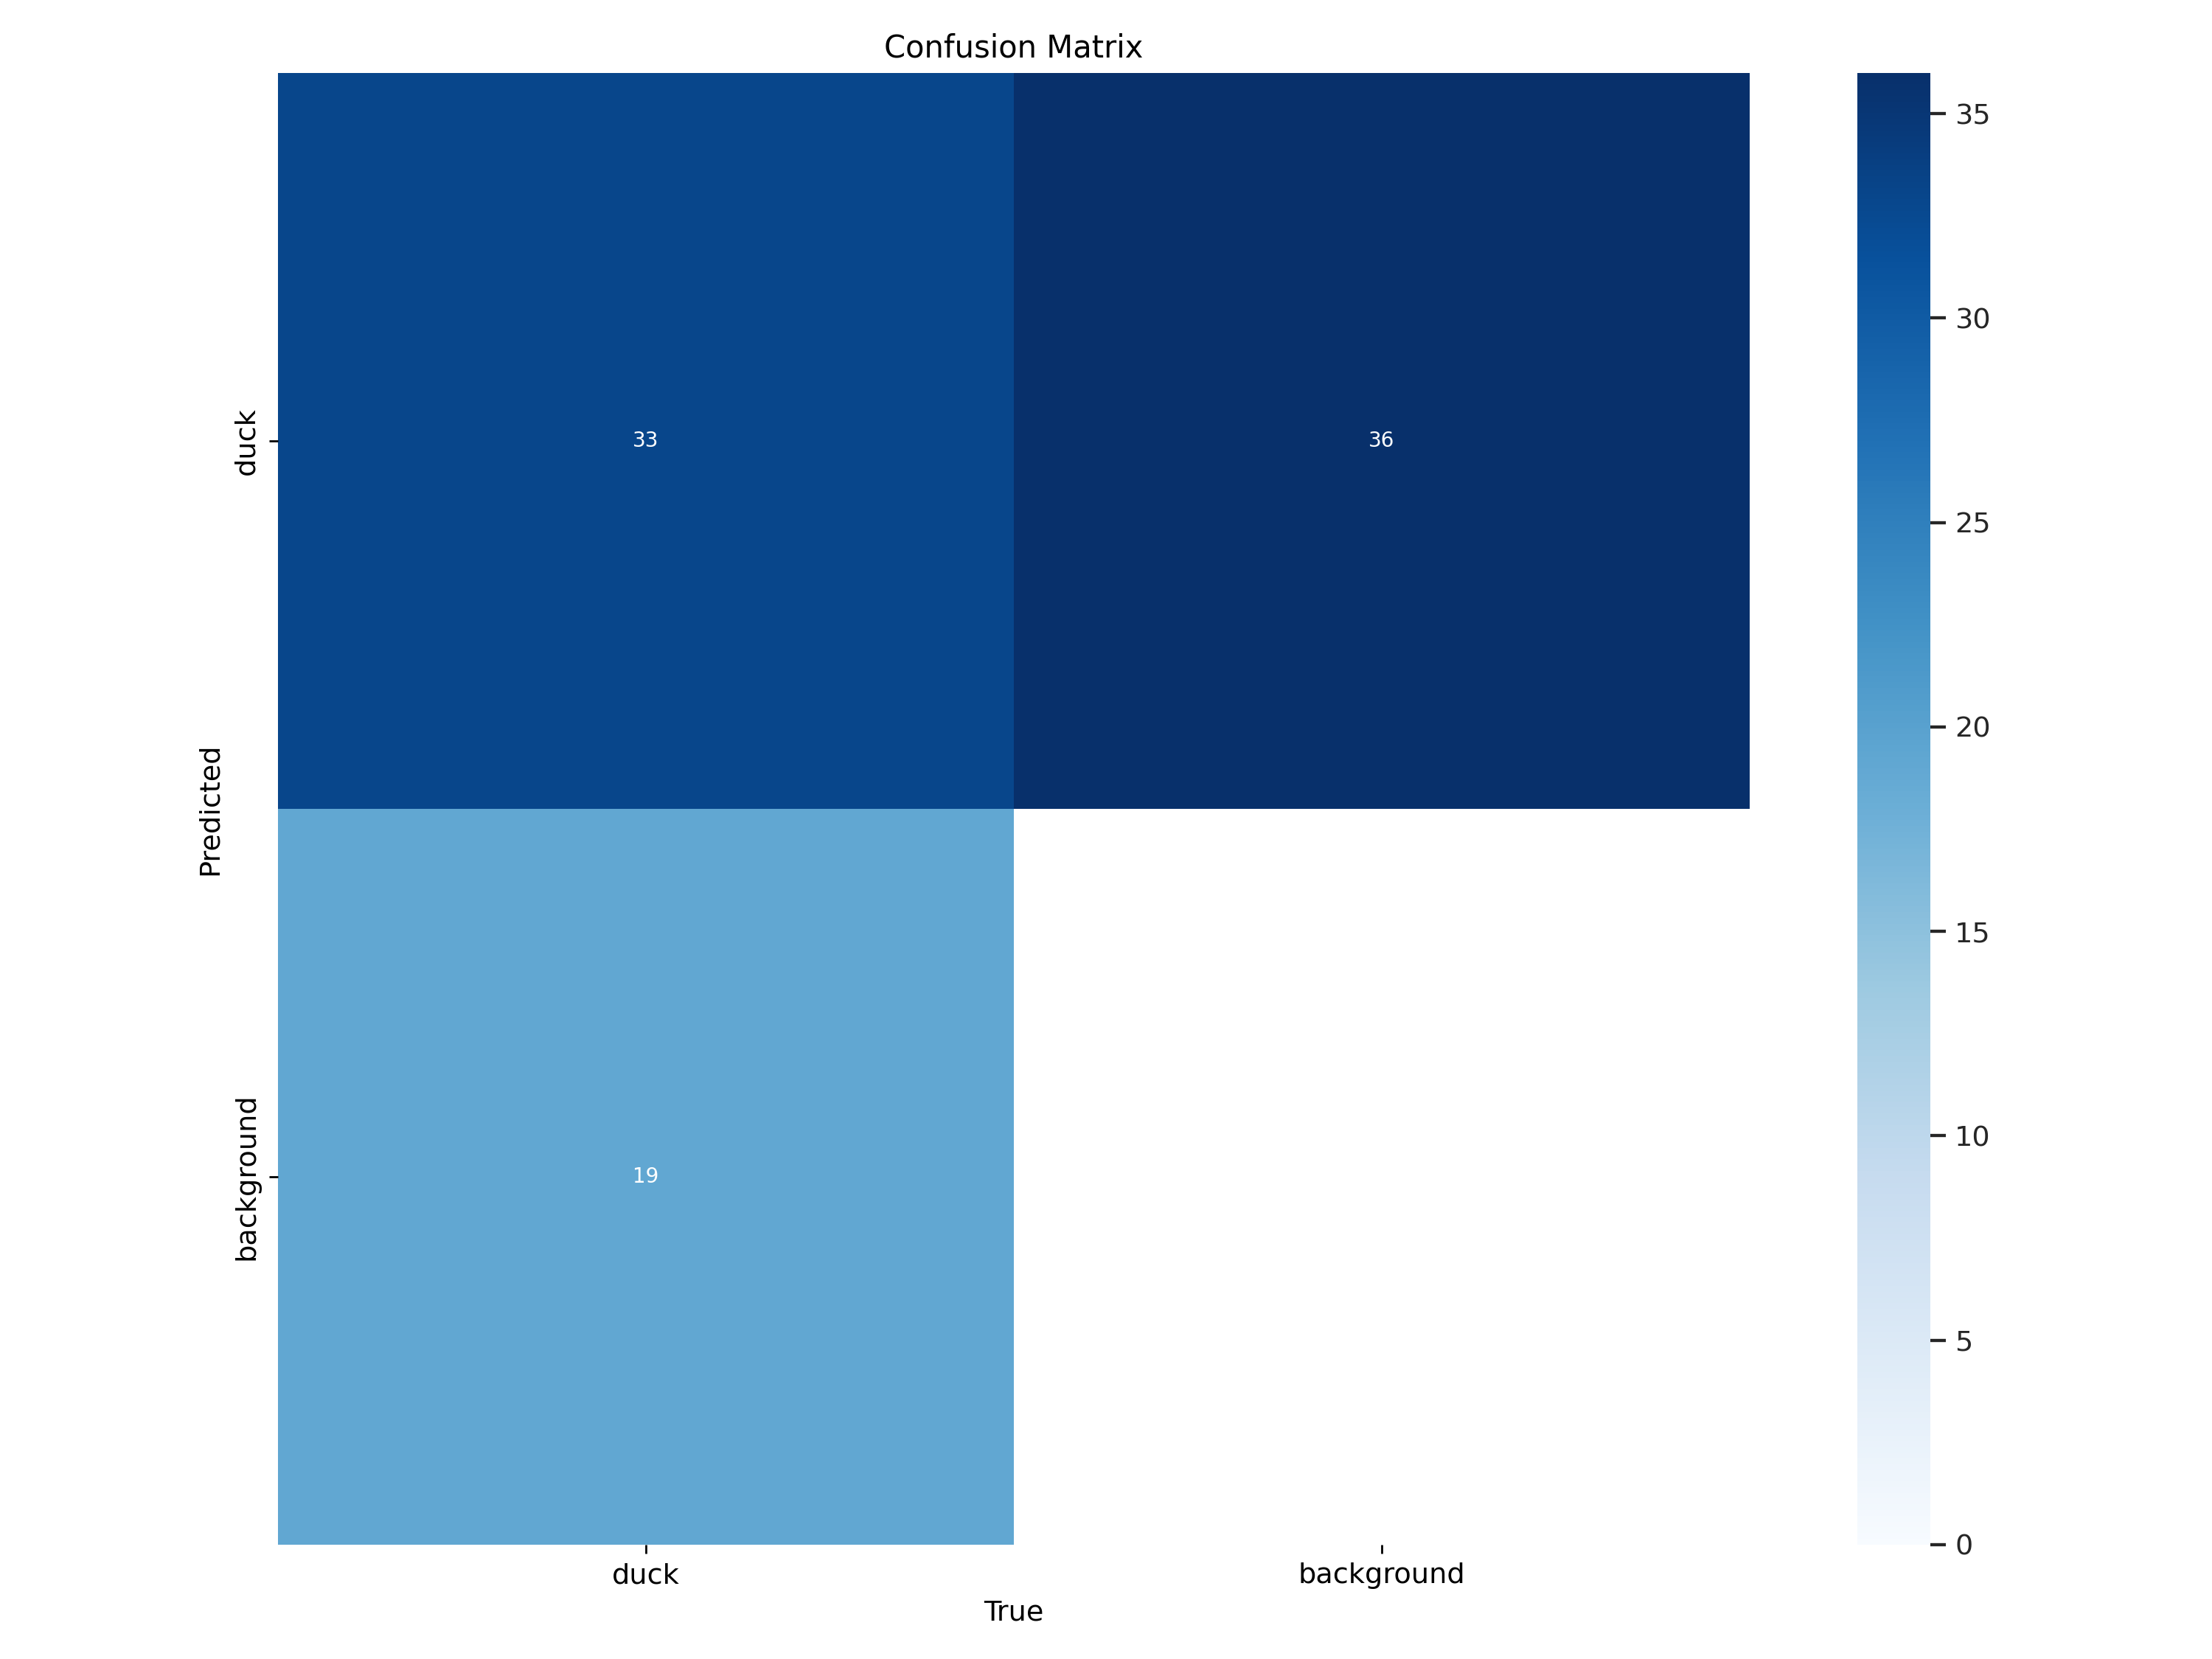

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/duck-yolov8/train2/confusion_matrix.png', width=600)

/content


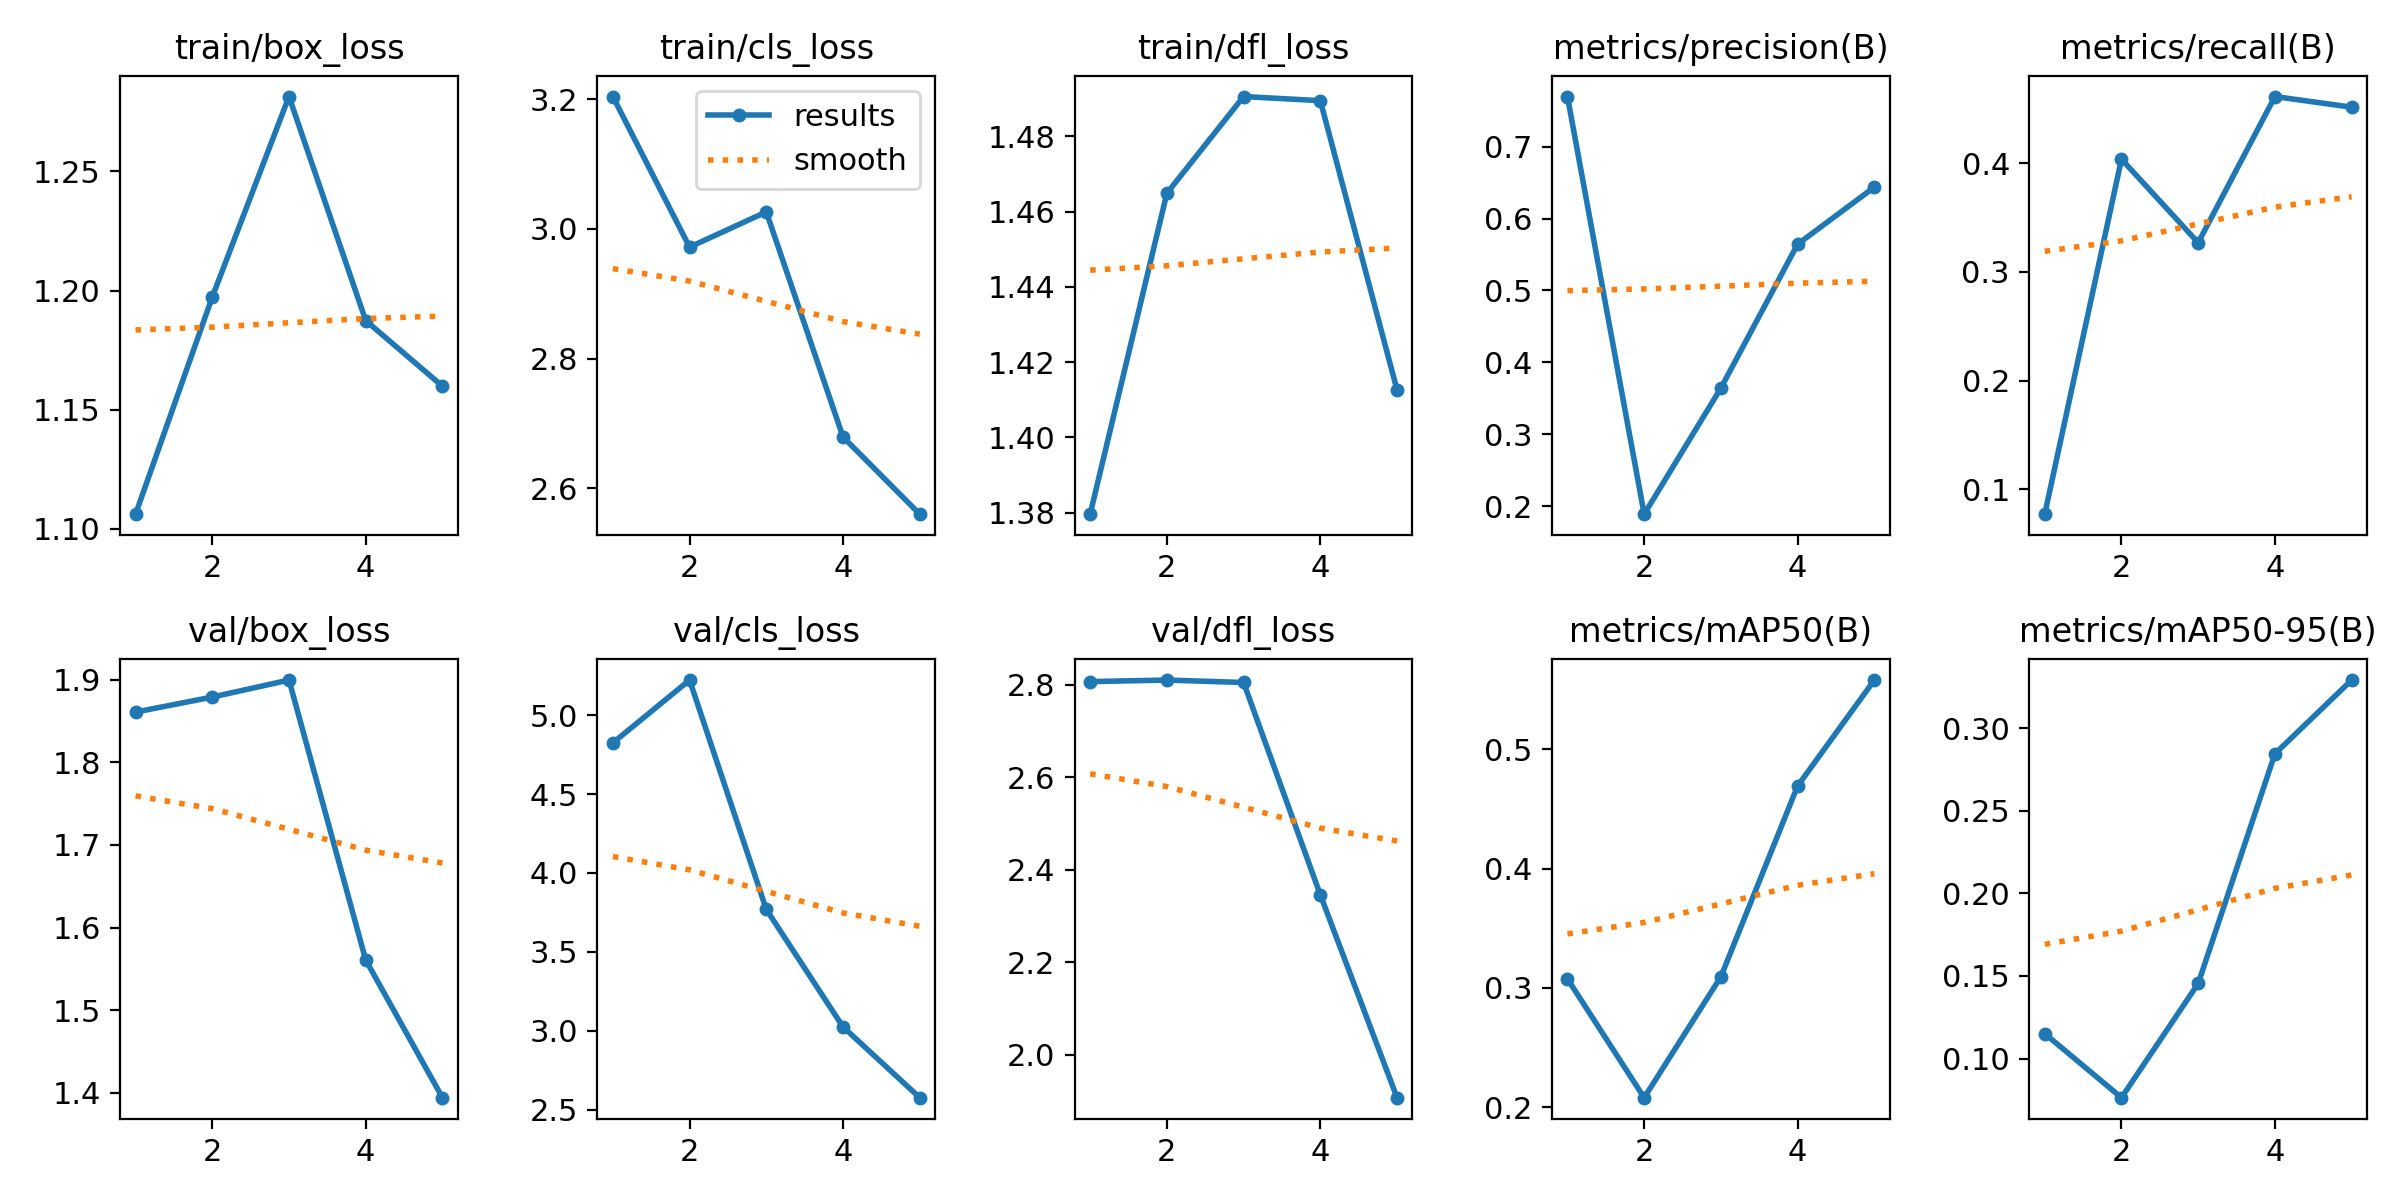

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/duck-yolov8/train2/results.png', width=600)


/content


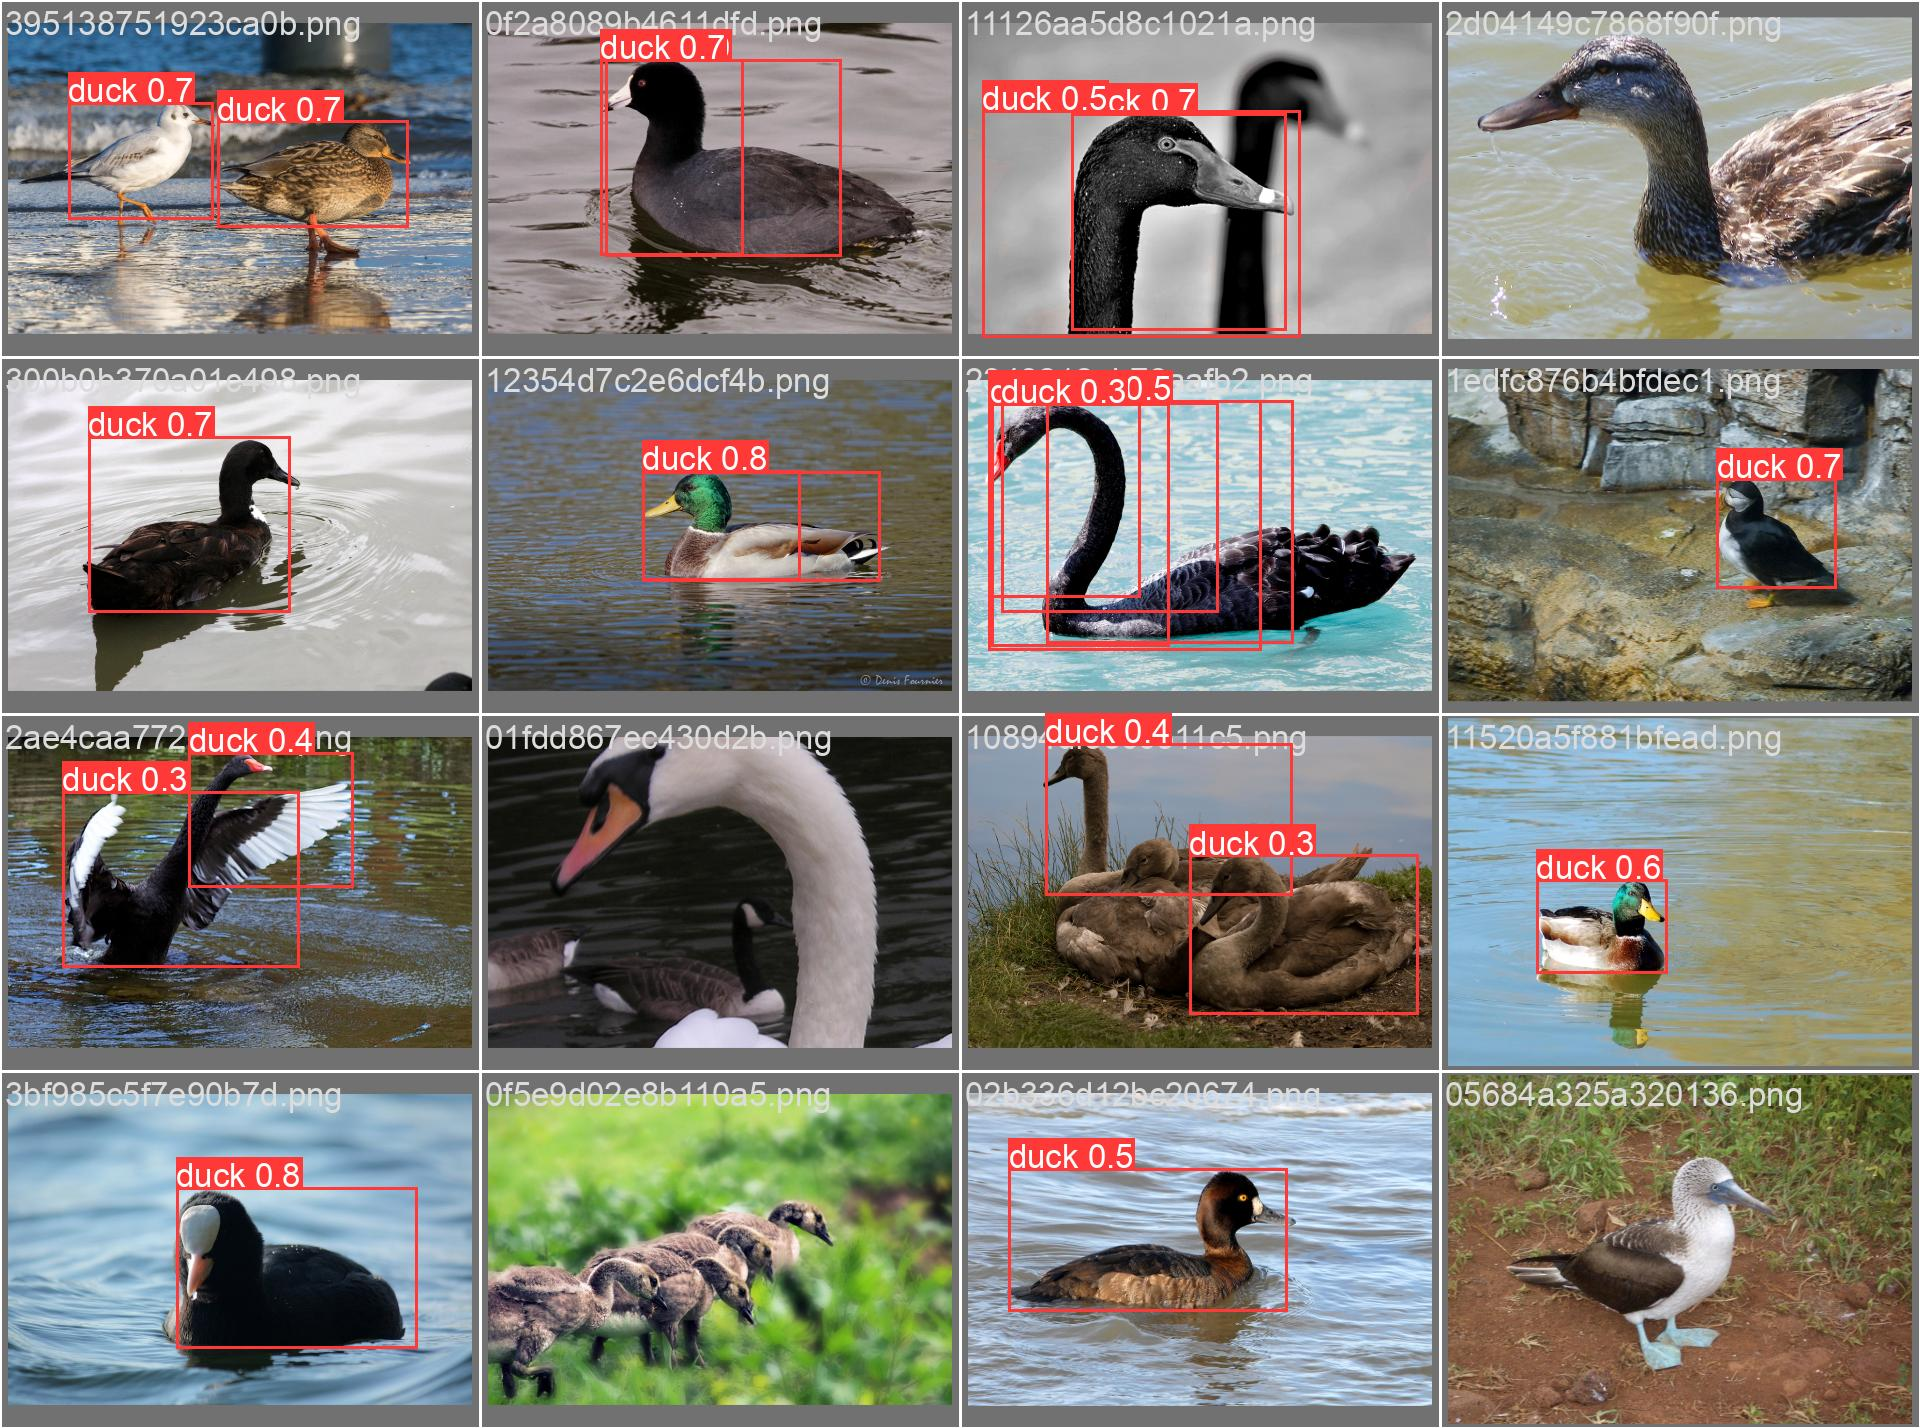

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/duck-yolov8/train2/val_batch0_pred.jpg', width=600)